# Modeling

In [1]:
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA, ARIMAResults
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.style.use('ggplot')

## Load dataframes

In [78]:
uptown = pd.read_csv('../data/uptown.csv').set_index('Unnamed: 0')
uptown.index.name = None
uptown.index = pd.to_datetime(uptown.index, format='%Y-%m')
uptown = uptown.rename(columns={'70115': 'Uptown'})


lgd = pd.read_csv('../data/lgd.csv').set_index('Unnamed: 0')
lgd.index.name = None
lgd.index = pd.to_datetime(lgd.index, format='%Y-%m')
lgd = lgd.rename(columns={'70130': 'Lower_Garden_District'})

audubon = pd.read_csv('../data/audubon.csv').set_index('Unnamed: 0')
audubon.index.name = None
audubon.index = pd.to_datetime(audubon.index, format='%Y-%m')
audubon = audubon.rename(columns={'70118': 'Audubon'})

metairie = pd.read_csv('../data/metairie.csv').set_index('Unnamed: 0')
metairie.index.name = None
metairie.index = pd.to_datetime(metairie.index, format='%Y-%m')
metairie = metairie.rename(columns={'70005': 'Metairie'})

aurora = pd.read_csv('../data/aurora.csv').set_index('Unnamed: 0')
aurora.index.name = None
aurora.index = pd.to_datetime(aurora.index, format='%Y-%m')
aurora = aurora.rename(columns={'70131': 'Aurora'})

In [79]:
aurora.head(1)

,Aurora
1996-04-01,90900.0


In [3]:
uptown.index

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=265, freq=None)

## Differencing periods that make each dataframe stationary

- Uptown: 1
- LGD: 2
- Audubon: 1
- Metairie: 2
- Aurora: 3

# Modeling - Uptown

In [4]:
# Note on freq: 'M' indicates the last day of month while 'MS' stands for ‘month start’.

uptown_arma = ARMA(uptown.diff(1).dropna(), order=(1,0), freq='MS')
res_arma = uptown_arma.fit()

print(f"AIC: {round(res_arma.aic, 2)}")
print(f"BIC: {round(res_arma.bic, 2)}")

AIC: 4533.65
BIC: 4544.38


In [5]:
uptown_arma = ARMA(uptown.diff(1).dropna(), order=(2,1), freq='MS')
res_arma = uptown_arma.fit()

print(f"AIC: {round(res_arma.aic, 2)}")
print(f"BIC: {round(res_arma.bic, 2)}")

AIC: 4392.3
BIC: 4410.18


In [6]:
uptown_arma = ARMA(uptown.diff(1).dropna(), order=(1,1), freq='MS')
res_arma = uptown_arma.fit()

print(f"AIC: {round(res_arma.aic, 2)}")
print(f"BIC: {round(res_arma.bic, 2)}")

AIC: 4391.0
BIC: 4405.3


## ARIMA Modeling - Uptown

### ARIMA Manual

In [7]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
# print(pdq)

# Generate all different combinations of seasonal p, q and q triplets (use 12 for frequency)
pdqs = [(x[0], x[1], x[2]) for x in pdq]

pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2)]

In [8]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

ans = []
lowest_aic = 10000
for comb in pdq:
    try:
        uptown_arima = sm.tsa.ARIMA(uptown, order=comb, freq='MS')
        output = uptown_arima.fit()
        ans.append([comb, output.aic])
        print('ARIMA {}: AIC Calculated = {}'.format(comb, round(output.aic, 2)))
        if output.aic < lowest_aic:
            lowest_aic = output.aic
    except:
        continue
        
print(round(lowest_aic, 4))

ARIMA (0, 0, 0): AIC Calculated = 6935.87
ARIMA (0, 0, 1): AIC Calculated = 6580.2
ARIMA (0, 1, 0): AIC Calculated = 4986.34
ARIMA (0, 1, 1): AIC Calculated = 4664.73
ARIMA (0, 2, 0): AIC Calculated = 4522.06
ARIMA (0, 2, 1): AIC Calculated = 4391.21
ARIMA (0, 2, 2): AIC Calculated = 4390.63
ARIMA (1, 0, 0): AIC Calculated = 5091.36
ARIMA (1, 1, 0): AIC Calculated = 4533.65
ARIMA (1, 1, 1): AIC Calculated = 4391.0
ARIMA (1, 2, 0): AIC Calculated = 4496.6
ARIMA (1, 2, 1): AIC Calculated = 4392.77
ARIMA (2, 0, 0): AIC Calculated = 4562.56
ARIMA (2, 0, 1): AIC Calculated = 4424.01
ARIMA (2, 1, 0): AIC Calculated = 4496.67
ARIMA (2, 1, 1): AIC Calculated = 4392.3
ARIMA (2, 2, 0): AIC Calculated = 4383.29
ARIMA (2, 2, 1): AIC Calculated = 4341.93
ARIMA (2, 2, 2): AIC Calculated = 4343.88
4341.9276


### Auto ARIMA

#### Train test split

In [9]:
len(uptown)

265

In [10]:
265/5

53.0

In [11]:
265 - 53

212

In [12]:
uptown_train = uptown.iloc[0:212]
uptown_test = uptown.iloc[212:]

In [13]:
len(uptown_train) + len(uptown_test) == 265

True

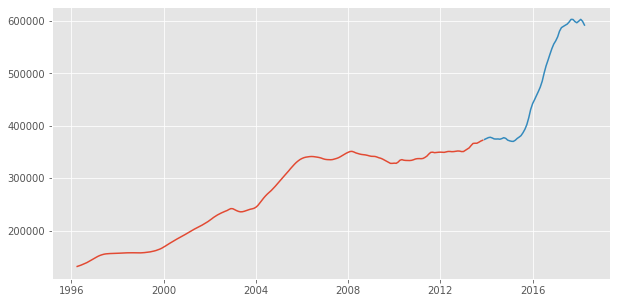

In [14]:
fig = plt.figure(figsize=(10,5))
plt.plot(uptown_train)
plt.plot(uptown_test)
plt.show()

Because the training set stops just as the test sets starts a sharp uptick, I'm going make the training set longer.

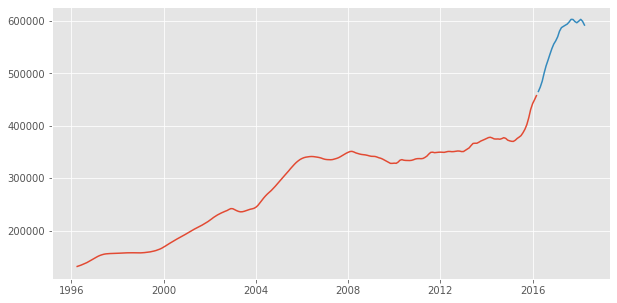

In [15]:
fig = plt.figure(figsize=(10,5))
uptown_train = uptown.iloc[0:240]
uptown_test = uptown.iloc[240:]
plt.plot(uptown_train)
plt.plot(uptown_test)
plt.show()

... a little more... Just do the last year

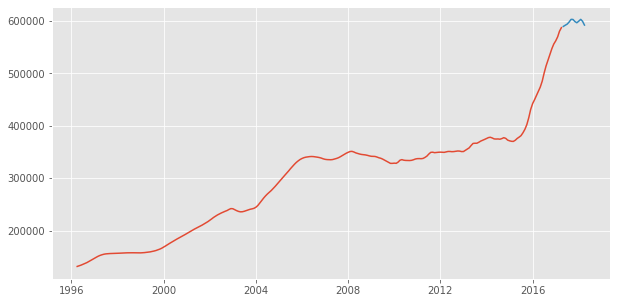

In [16]:
fig = plt.figure(figsize=(10,5))
uptown_train = uptown.iloc[0:253]
uptown_test = uptown.iloc[253:]
plt.plot(uptown_train)
plt.plot(uptown_test)
plt.show()

#### Run Auto ARIMA

In [17]:
uptown_auto_arima = auto_arima(uptown_train,
                               start_p=0, d=1, start_q=0,
                               max_p=4, max_d=5, max_q=5,
                               suppress_warnings=True, trace=True, stepwise=True, n_fits=20)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4751.491, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4748.285, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4727.912, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4828.363, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4673.952, Time=0.60 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4681.995, Time=0.53 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4680.768, Time=0.41 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4716.557, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4728.623, Time=0.32 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=4697.785, Time=0.34 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 3.292 seconds


In [18]:
uptown_auto_arima = auto_arima(uptown_train,
                               start_p=0, d=None, start_q=0,
                               max_p=4, max_d=5, max_q=5,
                               suppress_warnings=True, trace=True, stepwise=False, n_fits=20)

 ARIMA(0,2,0)(0,0,0)[1]             : AIC=4210.168, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[1]             : AIC=4220.492, Time=0.03 sec
 ARIMA(0,2,2)(0,0,0)[1]             : AIC=4221.230, Time=0.11 sec
 ARIMA(0,2,3)(0,0,0)[1]             : AIC=4212.790, Time=0.28 sec
 ARIMA(0,2,4)(0,0,0)[1]             : AIC=4223.535, Time=0.13 sec
 ARIMA(0,2,5)(0,0,0)[1]             : AIC=4220.363, Time=0.37 sec
 ARIMA(1,2,0)(0,0,0)[1]             : AIC=4211.275, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[1]             : AIC=4228.806, Time=0.14 sec
 ARIMA(1,2,2)(0,0,0)[1]             : AIC=inf, Time=0.46 sec
 ARIMA(1,2,3)(0,0,0)[1]             : AIC=4214.914, Time=0.70 sec
 ARIMA(1,2,4)(0,0,0)[1]             : AIC=inf, Time=0.59 sec
 ARIMA(2,2,0)(0,0,0)[1]             : AIC=4211.365, Time=0.14 sec
 ARIMA(2,2,1)(0,0,0)[1]             : AIC=4212.412, Time=0.54 sec
 ARIMA(2,2,2)(0,0,0)[1]             : AIC=inf, Time=0.65 sec
 ARIMA(2,2,3)(0,0,0)[1]             : AIC=4238.446, Time=0.72 sec
 ARIMA(3,2,0)(0,0,0)[1]  

**Auto ARIMA results:**  
My minimum AIC is 4673 for (1,1,1)  
My minimum AIC is 4210 for (0,2,0)

#### Compare with manual ARIMA on train set only

In [19]:
ans = []
lowest_aic = 10000
for comb in pdq:
    try:
        uptown_arima_train = sm.tsa.ARIMA(uptown_train, order=comb, freq='MS')
        output = uptown_arima_train.fit()
        ans.append([comb, output.aic])
        print('ARIMA {}: AIC Calculated = {}'.format(comb, round(output.aic, 2)))
        if output.aic < lowest_aic:
            lowest_aic = output.aic
    except:
        continue
        
print(round(lowest_aic, 4))

ARIMA (0, 0, 0): AIC Calculated = 6545.33
ARIMA (0, 0, 1): AIC Calculated = 6207.85
ARIMA (0, 0, 2): AIC Calculated = 5882.76
ARIMA (0, 1, 0): AIC Calculated = 4751.49
ARIMA (0, 1, 1): AIC Calculated = 4436.06
ARIMA (0, 2, 0): AIC Calculated = 4212.04
ARIMA (0, 2, 1): AIC Calculated = 4110.68
ARIMA (0, 2, 2): AIC Calculated = 4108.32
ARIMA (1, 0, 0): AIC Calculated = 4859.92
ARIMA (1, 1, 0): AIC Calculated = 4225.43
ARIMA (1, 1, 1): AIC Calculated = 4114.31
ARIMA (1, 1, 2): AIC Calculated = 4115.36
ARIMA (1, 2, 0): AIC Calculated = 4193.04
ARIMA (1, 2, 1): AIC Calculated = 4111.59
ARIMA (1, 2, 2): AIC Calculated = 4098.51
ARIMA (2, 0, 0): AIC Calculated = 4263.89
ARIMA (2, 1, 0): AIC Calculated = 4198.11
ARIMA (2, 1, 1): AIC Calculated = 4116.31
ARIMA (2, 1, 2): AIC Calculated = 4113.64
ARIMA (2, 2, 0): AIC Calculated = 4126.7
ARIMA (2, 2, 1): AIC Calculated = 4075.28
ARIMA (2, 2, 2): AIC Calculated = 4059.53
4059.5323


- Here my lowest AIC is 4059 which is ARIMA (2,2,2)
- Compared to the lowest AIC in autoARIMA, AIC is 4210 for (0,2,0).  
- Meanwhile for (2,2,2), autoARIMA doesn't even give a result ("inf").  

#### Check the models

In [20]:
output = uptown_auto_arima.fit(uptown_train)

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       1.11e+06   5.36e+04     20.700      0.000       1e+06    1.21e+06


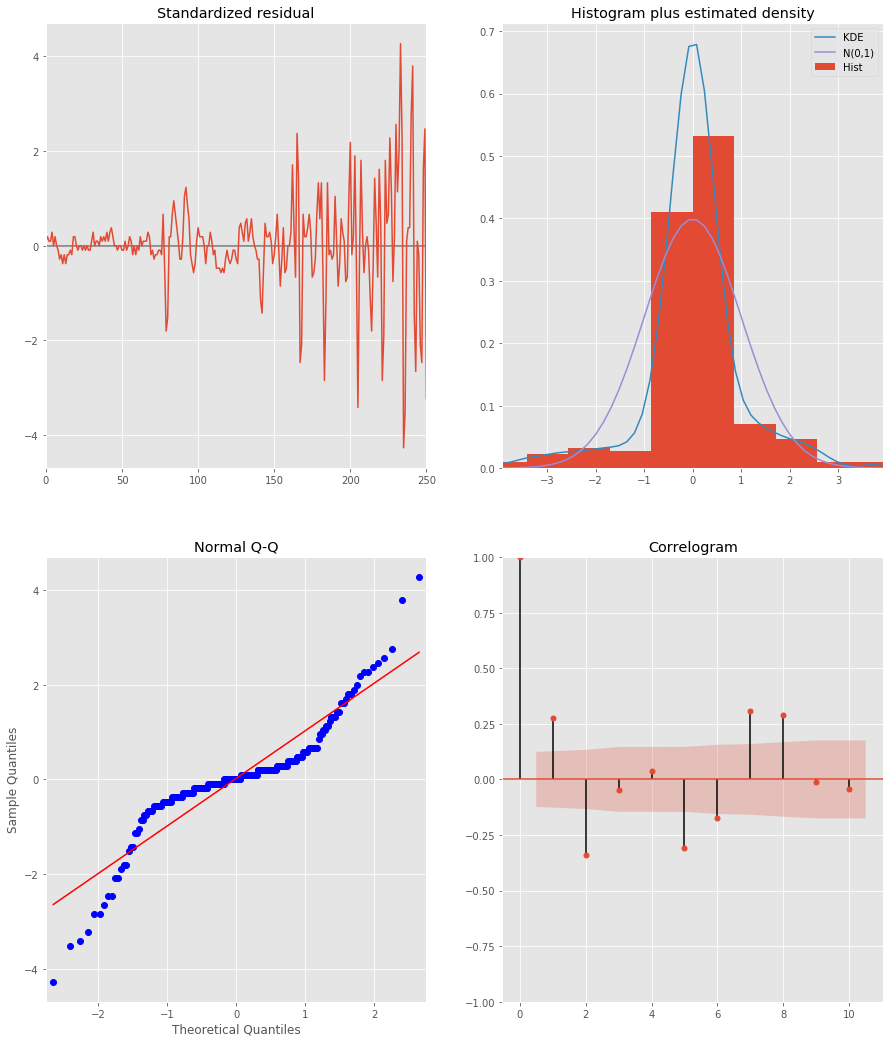

In [21]:
output.plot_diagnostics(figsize=(15, 18))
plt.show()

Not a great fit. Try the manual model (2,2,2)

In [22]:
uptown_arima = sm.tsa.ARIMA(uptown_train, order=[2,2,2])
output = uptown_arima.fit()

print(output.summary().tables[1])

C:\Users\halpe\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\halpe\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             16.0105     66.755      0.240      0.810    -114.826     146.847
ar.L1.D2.70115    -0.2842      0.092     -3.080      0.002      -0.465      -0.103
ar.L2.D2.70115    -0.5807      0.066     -8.768      0.000      -0.711      -0.451
ma.L1.D2.70115     1.0832      0.102     10.637      0.000       0.884       1.283
ma.L2.D2.70115     0.4937      0.083      5.916      0.000       0.330       0.657


In [23]:
# Note: Redoing with auto_arima because ARIMA doesn't have plot_diagnostics

uptown_arima = auto_arima(uptown_train,
                            start_p=2, d=2, start_q=2,
                            max_p=2, max_d=2, max_q=2,
                            suppress_warnings=True, trace=True, stepwise=False, n_jobs=1)

# This isn't working as I'd like it do. I want it to run just one model. 

 ARIMA(0,2,0)(0,0,0)[1]             : AIC=4210.168, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[1]             : AIC=4220.492, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[1]             : AIC=4221.230, Time=0.15 sec
 ARIMA(1,2,0)(0,0,0)[1]             : AIC=4211.275, Time=0.09 sec
 ARIMA(1,2,1)(0,0,0)[1]             : AIC=4228.806, Time=0.21 sec
 ARIMA(1,2,2)(0,0,0)[1]             : AIC=inf, Time=0.42 sec
 ARIMA(2,2,0)(0,0,0)[1]             : AIC=4211.365, Time=0.14 sec
 ARIMA(2,2,1)(0,0,0)[1]             : AIC=4212.412, Time=0.59 sec
 ARIMA(2,2,2)(0,0,0)[1]             : AIC=inf, Time=0.60 sec

Best model:  ARIMA(0,2,0)(0,0,0)[1]          
Total fit time: 2.269 seconds


C:\Users\halpe\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3745      0.175     -2.141      0.032      -0.717      -0.032
ar.L2         -0.7302      0.144     -5.065      0.000      -1.013      -0.448
ma.L1          0.3943      0.180      2.195      0.028       0.042       0.746
ma.L2          0.7063      0.151      4.682      0.000       0.411       1.002
sigma2      6.823e+05    2.4e+04     28.458      0.000    6.35e+05    7.29e+05


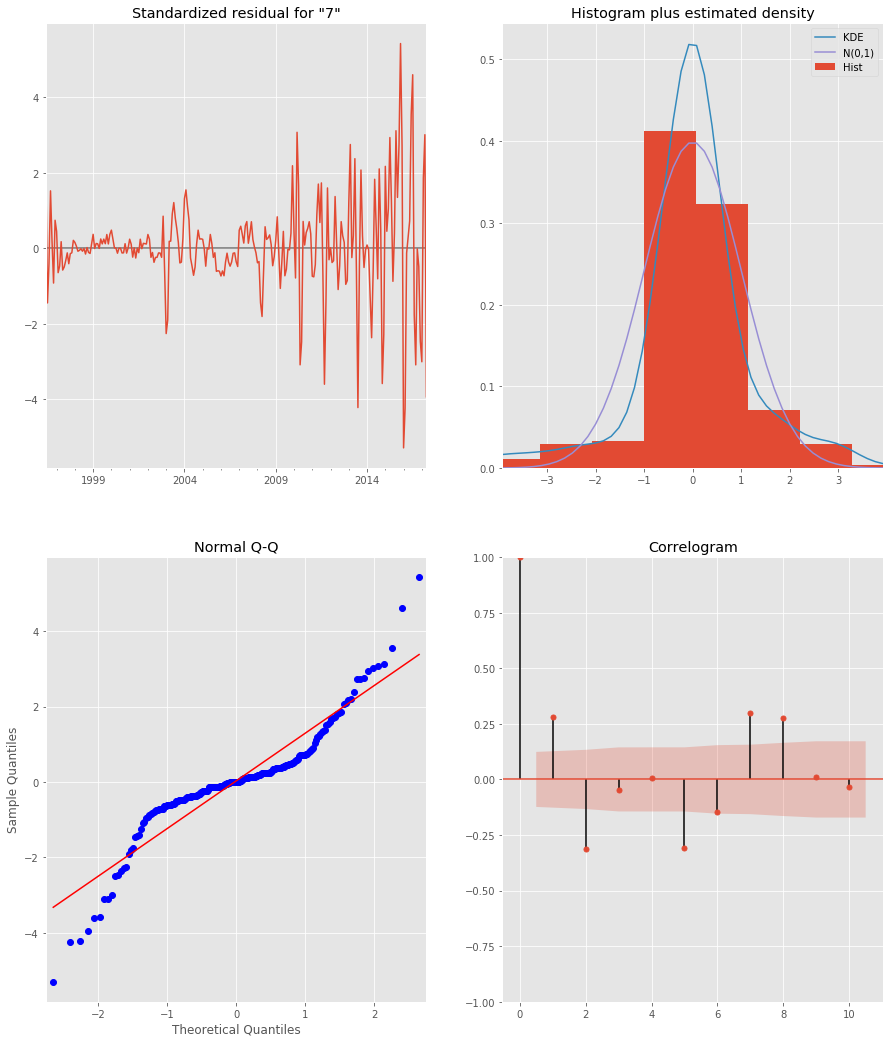

In [52]:
uptown_arima = sm.tsa.statespace.SARIMAX(uptown_train,
                                         freq='MS',
                                        order=(2,2,2), 
                                        enforce_stationarity=True, 
                                        enforce_invertibility=False)
output = uptown_arima.fit()
print(output.summary().tables[1])

output.plot_diagnostics(figsize=(15, 18))
plt.show()

Everything looks about the same. I'm just going to stick with autoARIMA for simplicity's sake. 

## Validating the model

### One-Step Ahead Forecasting

In [25]:
uptown_train.tail(1)

,70115
2017-04-01,587400.0


In [26]:
pred = output.get_prediction(start=pd.to_datetime('2016-04-01'), dynamic=False)
pred_conf = pred.conf_int()

In [27]:
output

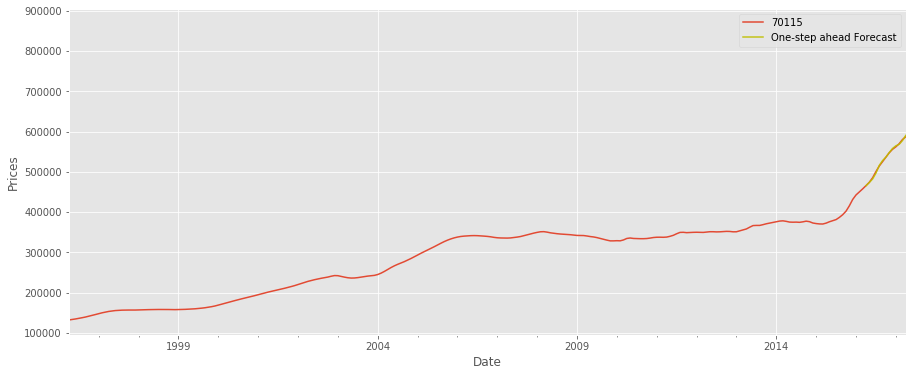

In [58]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = uptown_train.rename({'70115':'Uptown'}).plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9, color='y')

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Prices')
plt.legend()

plt.show()

In [29]:
from sklearn.metrics import mean_squared_error

# Get the real and predicted values
uptown_train_forecasted = pred.predicted_mean
uptown_train_truth = uptown_train['2016-04-01':]
# print(uptown_train_forecasted)
# print(uptown_train_truth)
# print(uptown_train_forecasted - uptown_train_truth)

rms = mean_squared_error(uptown_train_truth, uptown_train_forecasted, squared=False)
round(rms, 2)
# Compute the mean square error
# mse = ((uptown_train_forecasted - uptown_train_truth) ** 2).mean()
# print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

2178.03

### Dynamic Forecasting

In [30]:
pred_dynamic = output.get_prediction(start=pd.to_datetime('2016-04-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

In [31]:
output

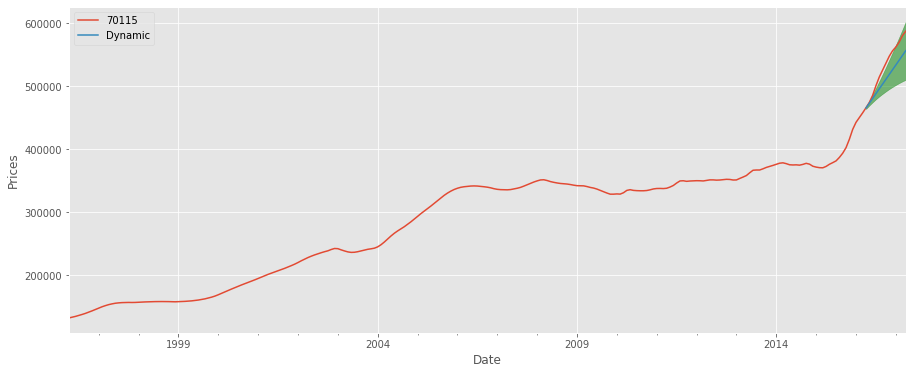

In [32]:
rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = uptown_train.plot(label='uptown')

# Plot predicted values
pred_dynamic.predicted_mean.plot(ax=ax, label='Dynamic')

# Plot the range for confidence intervals
ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Prices')
plt.legend()

plt.show()

In [33]:
uptown_train_forecasted = pred_dynamic.predicted_mean
uptown_train_truth = uptown_train['2016-04-01':]

rms = mean_squared_error(uptown_train_truth, uptown_train_forecasted, squared=False)
round(rms, 2)

23203.68

## Producing Forecasts

In [34]:
# Get forecast 24 steps ahead in future
prediction = output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

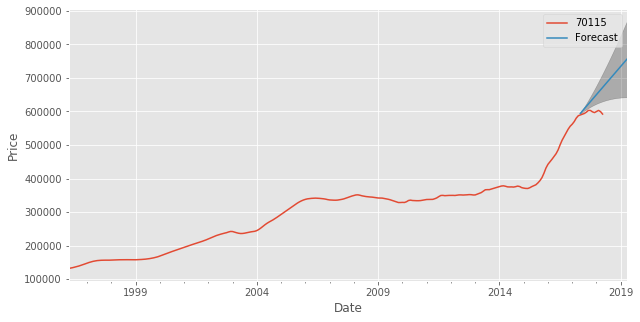

In [55]:
# should I do uptown_train or all of uptown for the plotting?

ax = uptown.plot(label='observed', figsize=(10,5))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

In [57]:
output.forecast(12)

2017-05-01    594249.247066
2017-06-01    601341.091763
2017-07-01    608452.160365
2017-08-01    615378.878982
2017-09-01    622360.603805
2017-10-01    629456.343771
2017-11-01    636469.215320
2017-12-01    643429.866908
2018-01-01    650470.588588
2018-02-01    657519.454074
2018-03-01    664506.800548
2018-04-01    671511.240726
Freq: MS, Name: predicted_mean, dtype: float64

This is the model for the test set to be compared with actual test set with RMSE. Both have 12 months.  
You can then use 24 to predict into the future.

When you find the best model, re-run it on the entire dataset for future predictions.  

# Modeling - Lower Garden District

## Auto ARIMA

### Train Test Split

Just going with 12 months of test data

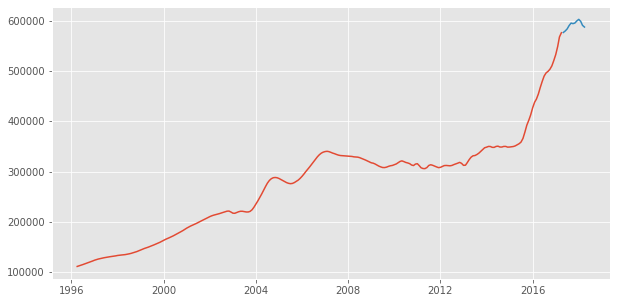

In [36]:
fig = plt.figure(figsize=(10,5))
lgd_train = lgd.iloc[0:253]
lgd_test = lgd.iloc[253:]
plt.plot(lgd_train)
plt.plot(lgd_test)
plt.show()

### Run Auto ARIMA

In [37]:
lgd_auto_arima = auto_arima(lgd_train,
                               start_p=0, d=None, start_q=0,
                               max_p=4, max_d=5, max_q=5,
                               suppress_warnings=True, trace=True, stepwise=False, n_fits=20)

 ARIMA(0,2,0)(0,0,0)[1]             : AIC=4396.317, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[1]             : AIC=4400.078, Time=0.03 sec
 ARIMA(0,2,2)(0,0,0)[1]             : AIC=4404.387, Time=0.09 sec
 ARIMA(0,2,3)(0,0,0)[1]             : AIC=4410.157, Time=0.08 sec
 ARIMA(0,2,4)(0,0,0)[1]             : AIC=4406.949, Time=0.12 sec
 ARIMA(0,2,5)(0,0,0)[1]             : AIC=4406.589, Time=0.28 sec
 ARIMA(1,2,0)(0,0,0)[1]             : AIC=4396.947, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[1]             : AIC=4402.564, Time=0.09 sec
 ARIMA(1,2,2)(0,0,0)[1]             : AIC=inf, Time=0.41 sec
 ARIMA(1,2,3)(0,0,0)[1]             : AIC=4399.941, Time=0.53 sec
 ARIMA(1,2,4)(0,0,0)[1]             : AIC=4409.109, Time=0.30 sec
 ARIMA(2,2,0)(0,0,0)[1]             : AIC=4410.880, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[1]             : AIC=inf, Time=0.41 sec
 ARIMA(2,2,2)(0,0,0)[1]             : AIC=inf, Time=0.60 sec
 ARIMA(2,2,3)(0,0,0)[1]             : AIC=4409.766, Time=0.66 sec
 ARIMA(3,2,0)(0,0,0)[1]  

#### Check the model

In [38]:
lgd_output = lgd_auto_arima.fit(lgd_train)

print(lgd_output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       2.33e+06   8.44e+04     27.614      0.000    2.16e+06     2.5e+06


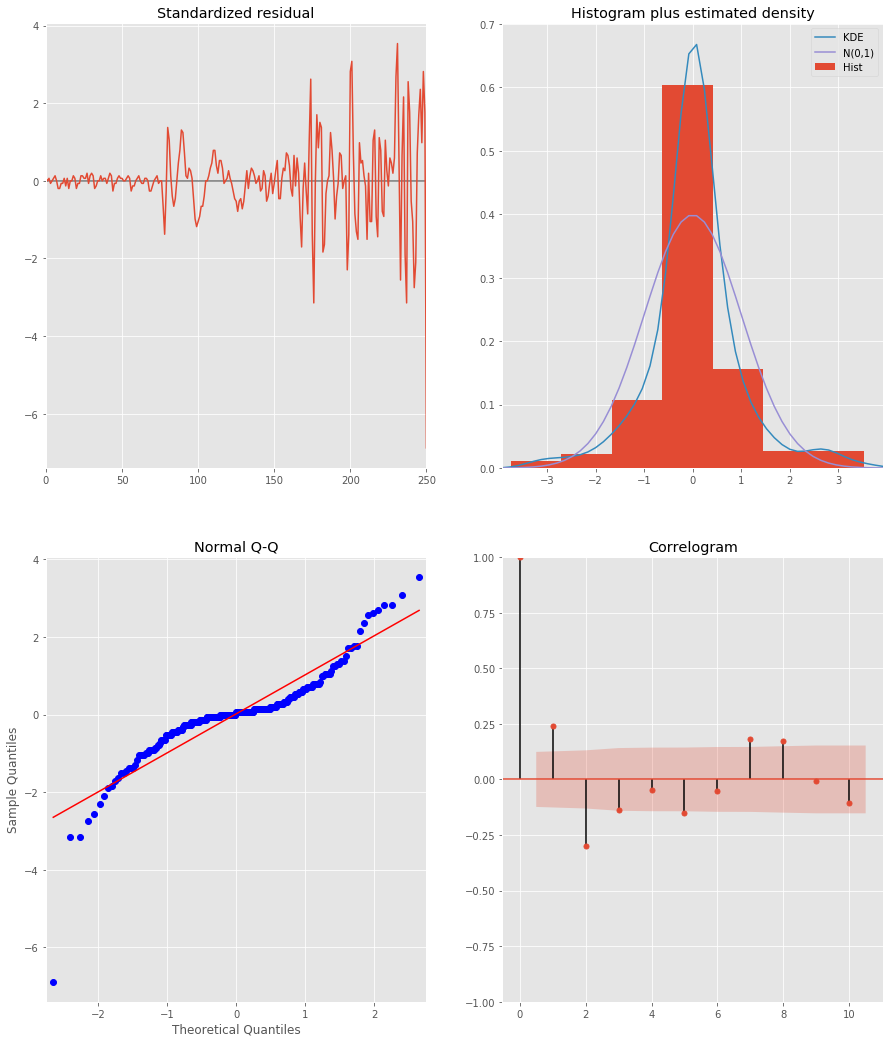

In [39]:
lgd_output.plot_diagnostics(figsize=(15, 18))
plt.show()

Making it SARIMAX for increased functionality

C:\Users\halpe\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3745      0.175     -2.141      0.032      -0.717      -0.032
ar.L2         -0.7302      0.144     -5.065      0.000      -1.013      -0.448
ma.L1          0.3943      0.180      2.195      0.028       0.042       0.746
ma.L2          0.7063      0.151      4.682      0.000       0.411       1.002
sigma2      6.823e+05    2.4e+04     28.458      0.000    6.35e+05    7.29e+05


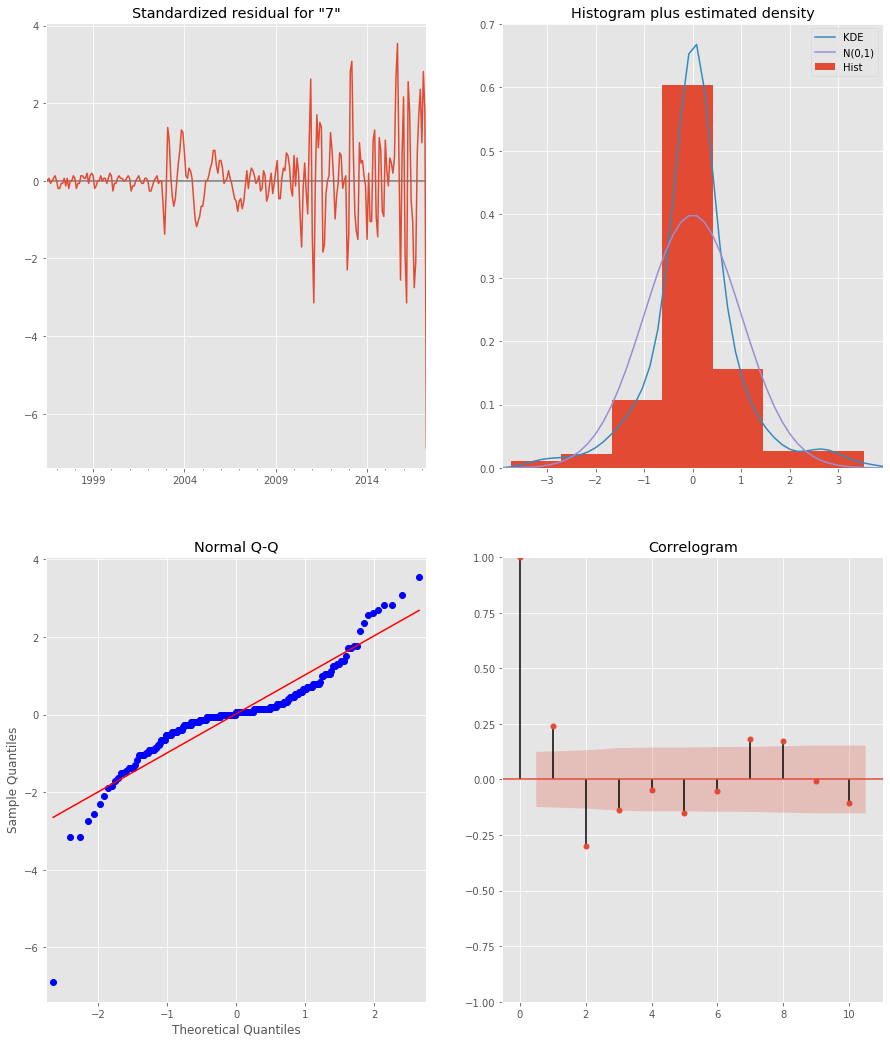

In [53]:
lgd_arima = sm.tsa.statespace.SARIMAX(lgd_train, 
                                        order=(0,2,0), 
                                      freq='MS',
                                        enforce_stationarity=True, 
                                        enforce_invertibility=False)
lgd_output = lgd_arima.fit()
print(output.summary().tables[1])

lgd_output.plot_diagnostics(figsize=(15, 18))
plt.show()

## Validating the model

### Dynamic Forecasting

In [47]:
lgd_output

In [50]:
pred_dynamic = lgd_output.get_prediction(start=pd.to_datetime('2016-04-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

In [54]:
lgd_train_forecasted = pred_dynamic.predicted_mean
lgd_train_truth = lgd_train['2016-04-01':]

rms = mean_squared_error(lgd_train_truth, lgd_train_forecasted, squared=False)
round(rms, 2)

26437.4

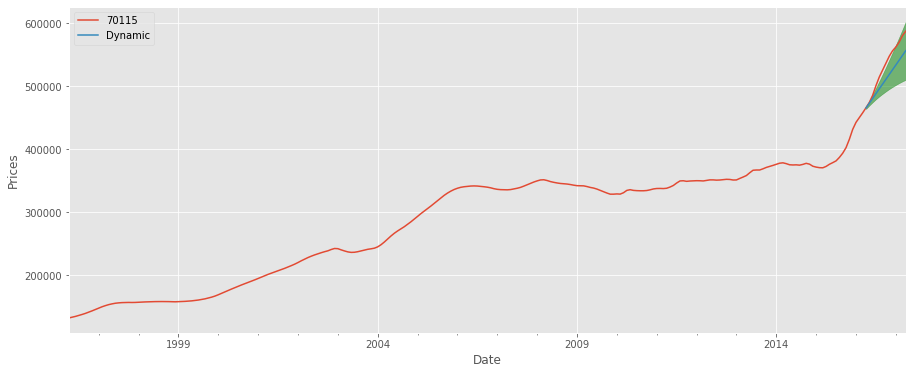

In [49]:
rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = uptown_train.plot(label='uptown')

# Plot predicted values
pred_dynamic.predicted_mean.plot(ax=ax, label='Dynamic')

# Plot the range for confidence intervals
ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Prices')
plt.legend()

plt.show()